# Lab-2: 

**Goal:**

**Authors:** Atul Shreewastav & Om Prakash Sharma


In [49]:
data_dict = {'Outlook':['sunny','sunny','overcast','rainy','rainy','rainy','overcast','sunny','sunny','rainy','sunny','overcast','overcast','rainy'],
            'Temperature':['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild'],
            'Humidity':['high','high','high','high','normal','normal','normal','high','normal','normal','normal','high','normal','high'],
            'Wind':['weak','strong','weak','weak','weak','strong','strong','weak','weak','strong','weak','weak','weak','strong'],
            'Play':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

In [50]:
import pandas as pd

In [51]:
df = pd.DataFrame()

In [52]:
df = pd.DataFrame(data_dict)

In [53]:
df

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,hot,high,weak,No
1,sunny,hot,high,strong,No
2,overcast,hot,high,weak,Yes
3,rainy,mild,high,weak,Yes
4,rainy,cool,normal,weak,Yes
5,rainy,cool,normal,strong,No
6,overcast,cool,normal,strong,Yes
7,sunny,mild,high,weak,No
8,sunny,cool,normal,weak,Yes
9,rainy,mild,normal,strong,Yes


In [54]:
df_encoded = pd.get_dummies(df, columns=df.columns[:-1], dtype=int)

In [55]:
df_encoded

,Play,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Wind_strong,Wind_weak
0,No,0,0,1,0,1,0,1,0,0,1
1,No,0,0,1,0,1,0,1,0,1,0
2,Yes,1,0,0,0,1,0,1,0,0,1
3,Yes,0,1,0,0,0,1,1,0,0,1
4,Yes,0,1,0,1,0,0,0,1,0,1
5,No,0,1,0,1,0,0,0,1,1,0
6,Yes,1,0,0,1,0,0,0,1,1,0
7,No,0,0,1,0,0,1,1,0,0,1
8,Yes,0,0,1,1,0,0,0,1,0,1
9,Yes,0,1,0,0,0,1,0,1,1,0


In [56]:
# instantiate a decision tree model using Entropy as the splitting criterion
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [57]:
model = DecisionTreeClassifier(criterion='entropy')

In [58]:
X = df_encoded.copy()
X.drop('Play',axis=1,inplace=True)
X

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Wind_strong,Wind_weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,1,0


In [59]:
y = df_encoded['Play']
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [61]:
train_data = pd.concat([X_train, y_train],axis=1)
train_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Wind_strong,Wind_weak,Play
2,1,0,0,0,1,0,1,0,0,1,Yes
10,0,0,1,0,0,1,0,1,0,1,Yes
5,0,1,0,1,0,0,0,1,1,0,No
11,1,0,0,0,0,1,1,0,0,1,Yes
13,0,1,0,0,0,1,1,0,1,0,No
1,0,0,1,0,1,0,1,0,1,0,No
0,0,0,1,0,1,0,1,0,0,1,No
4,0,1,0,1,0,0,0,1,0,1,Yes
9,0,1,0,0,0,1,0,1,1,0,Yes


In [62]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [63]:
y_pred = model.predict(X_test)

[Text(0.5, 0.875, 'Wind_weak <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]\nclass = Yes'),
 Text(0.3, 0.625, 'Humidity_high <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = No'),
 Text(0.2, 0.375, 'Temperature_mild <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.1, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.3, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.7, 0.625, 'Outlook_sunny <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Yes'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes'),
 Text(0.8, 0.375, 'Humidity_normal <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.7, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.9, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes')]

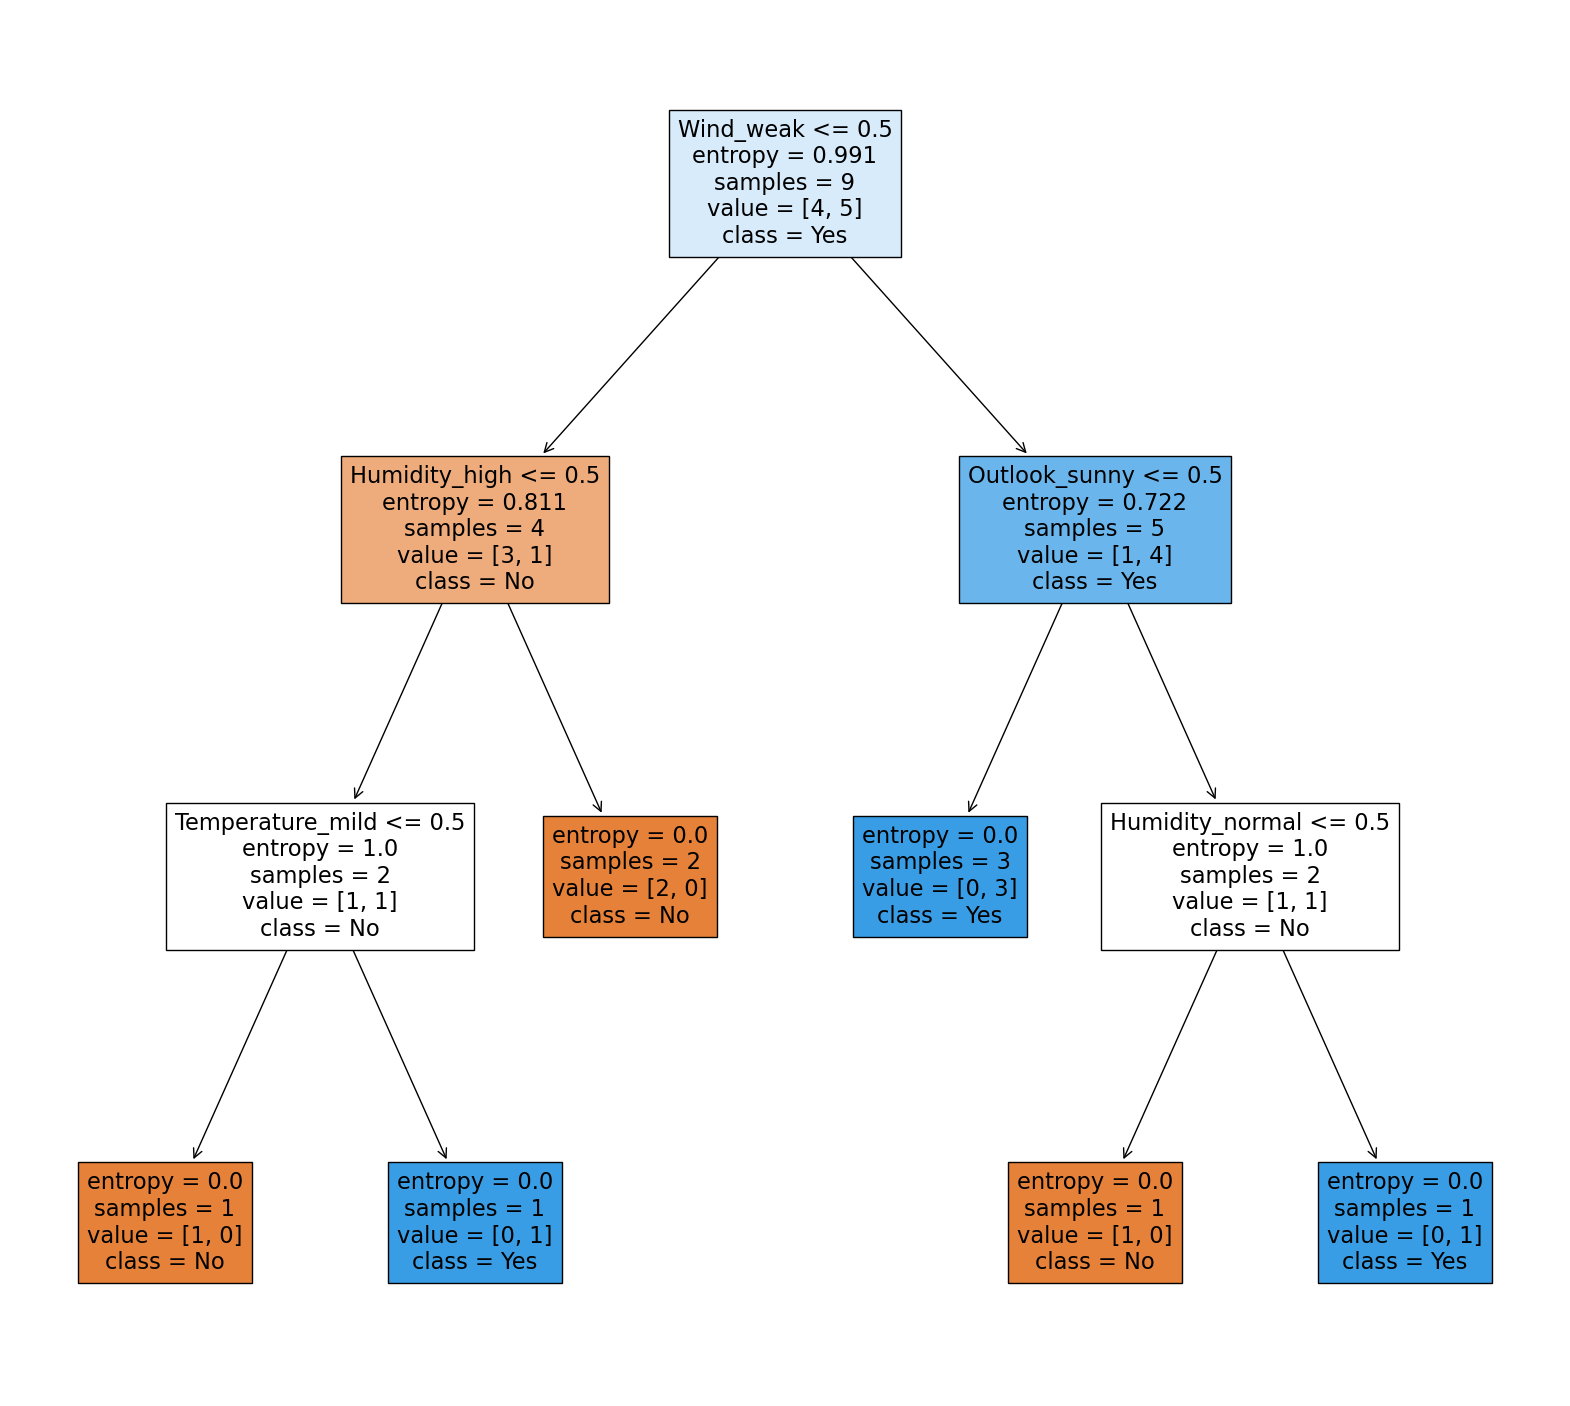

In [104]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize=(20,18))
plot_tree(model,  feature_names=X.columns, class_names=y.unique(), filled=True)

In [105]:
y_pred

array(['Yes', 'Yes', 'Yes', 'No', 'Yes'], dtype=object)

In [66]:
y_test= y_test.reset_index(drop=True)
y_test

0    Yes
1     No
2    Yes
3    Yes
4    Yes
Name: Play, dtype: object

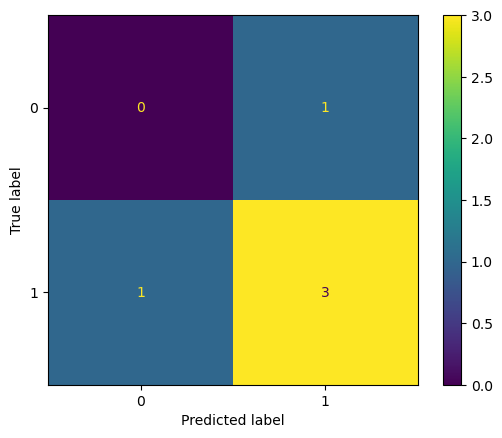

In [106]:
# compute the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

<Axes: >

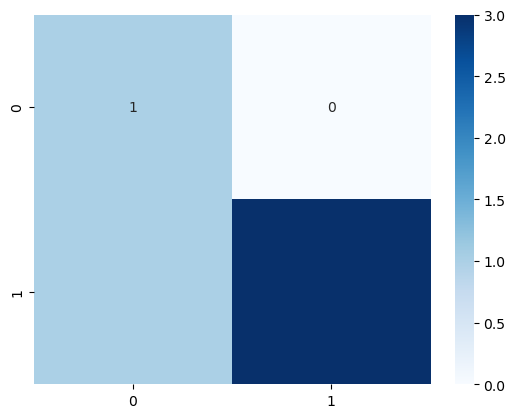

In [68]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



In [22]:
macro_avg = (0 + 0.75)/2
macro_avg

0.375

In [23]:
weighted_avg = (1*0+4*0.75)/5
weighted_avg

0.6

In [24]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
print(tp, fp, fn, tn)

0 1 1 3


In [25]:
precison = tp/(tp+fp)
precison

0.0

In [26]:
recall = tp/(tp+fn)
recall

0.0

In [27]:
f1_score = 2*(precison*recall)/(precison+recall)
f1_score

C:\Users\atuls\AppData\Local\Temp\ipykernel_17772\3757539536.py:1: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2*(precison*recall)/(precison+recall)


nan

In [28]:
precision = tn/(fn+tn)
precision

0.75

In [29]:
recall = tn/(tn+fp)
recall

0.75

In [30]:
f1_score = 2*precision*recall/(precision+recall)
f1_score

0.75

In [31]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.6

In [32]:
macro_avg = (precision + recall + f1_score)/3
macro_avg

0.75

In [33]:
off_diagonal_sum = 0
split = 0
for i in range(1,14):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=10)
    
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
    sum = fp + fn
    if sum == off_diagonal_sum:
        split = i

In [34]:
split

0

In [36]:
confusion_matrix(y_test, y_pred)

array([[0, 0],
       [1, 0]])

In [37]:
len(X)
len(y)

14

In [38]:
for i in range(1,100):
    split_size = i/100
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=10)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f'Confusion Matrix at split_size = {split_size}')
        print(confusion_matrix(y_test, y_pred))
    except ValueError:
        print(f'ERROR AT split_size = {split_size}')

Confusion Matrix at split_size = 0.01
[[0 0]
 [1 0]]
Confusion Matrix at split_size = 0.02
[[0 0]
 [1 0]]
Confusion Matrix at split_size = 0.03
[[0 0]
 [1 0]]
Confusion Matrix at split_size = 0.04
[[0 0]
 [1 0]]
Confusion Matrix at split_size = 0.05
[[0 0]
 [1 0]]
Confusion Matrix at split_size = 0.06
[[0 0]
 [1 0]]
Confusion Matrix at split_size = 0.07
[[0 0]
 [1 0]]
Confusion Matrix at split_size = 0.08
[[1 0]
 [1 0]]
Confusion Matrix at split_size = 0.09
[[1 0]
 [1 0]]
Confusion Matrix at split_size = 0.1
[[1 0]
 [1 0]]
Confusion Matrix at split_size = 0.11
[[1 0]
 [1 0]]
Confusion Matrix at split_size = 0.12
[[1 0]
 [1 0]]
Confusion Matrix at split_size = 0.13
[[1 0]
 [1 0]]
Confusion Matrix at split_size = 0.14
[[1 0]
 [1 0]]
Confusion Matrix at split_size = 0.15
[[1 0]
 [1 1]]
Confusion Matrix at split_size = 0.16
[[1 0]
 [1 1]]
Confusion Matrix at split_size = 0.17
[[1 0]
 [1 1]]
Confusion Matrix at split_size = 0.18
[[1 0]
 [1 1]]
Confusion Matrix at split_size = 0.19
[[1 0]
 [

In [39]:
# generate ideal confusion matrix for random state = 10
import numpy as np

def find_best_split(X, y):
    splits = np.arange(0.1, 0.9, 0.1)
    best_split = None
    best_confusion_matrix = None
    best_score = -np.inf

    for split in splits:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=10, stratify=y)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        score = np.trace(cm)  # Sum of diagonal elements (true positives + true negatives)
        
        if score > best_score:
            best_score = score
            best_split = split
            best_confusion_matrix = cm

    return best_split, best_confusion_matrix, accuracy

# Find the best split
best_split, best_confusion_matrix, accuracy = find_best_split(X, y)

print(f"Best Split: {best_split}")
print("Best Confusion Matrix:")
print(best_confusion_matrix)
print(f"Accuracy: {accuracy}")

Best Split: 0.8
Best Confusion Matrix:
[[2 2]
 [2 6]]
Accuracy: 0.6666666666666666


In [40]:
max_accuracy = 0
split = 0
for i in range(1,14):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > max_accuracy:
        split = i
        max_accuracy = accuracy

In [41]:
print(split, max_accuracy)

5 0.8


In [42]:
# from sklearn.metrics import ConfusionMatrixDisplay
# from matplotlib import pyplot as plt
# split = 0
# off_diagonal_sum =0
# for i in range(1, 14):
#     test_size = i
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)
    
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     cm = confusion_matrix(y_test, y_pred)
#     if len(cm) == 2:
#         tp, fn, fp, tn = cm.ravel()
#         current_sum = fp + fn
#     else:
#         current_sum = sum([cm[i][j] for i in range(len(cm)) for j in range(len(cm[i])) if i != j])
#         if current_sum == off_diagonal_sum:
#             split = test_size
#             break

# # Print the results
# print(f"Ideal test size: {split}")

# # Train and predict with the ideal split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=10)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)

# # Display the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.title('Ideal Confusion Matrix')
# plt.show()

In [45]:
for i in range(1,13):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i ,random_state=10, stratify=y)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

ValueError: The test_size = 1 should be greater or equal to the number of classes = 2

In [35]:
y_test

0    Yes
1     No
2    Yes
3    Yes
4    Yes
Name: Play, dtype: object

In [36]:
# USing the value of Yes and No in the class attribute, find the best split
y_pred

array(['Yes', 'Yes', 'Yes', 'No', 'Yes'], dtype=object)

In [ ]:
np.arange(0.01,0.99,0.01)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98])

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

[Text(0.5, 0.875, 'Wind_weak <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]\nclass = Yes'),
 Text(0.3, 0.625, 'Humidity_high <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = No'),
 Text(0.2, 0.375, 'Temperature_mild <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.7, 0.625, 'Temperature_hot <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Yes'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes'),
 Text(0.8, 0.375, 'Outlook_overcast <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes')]

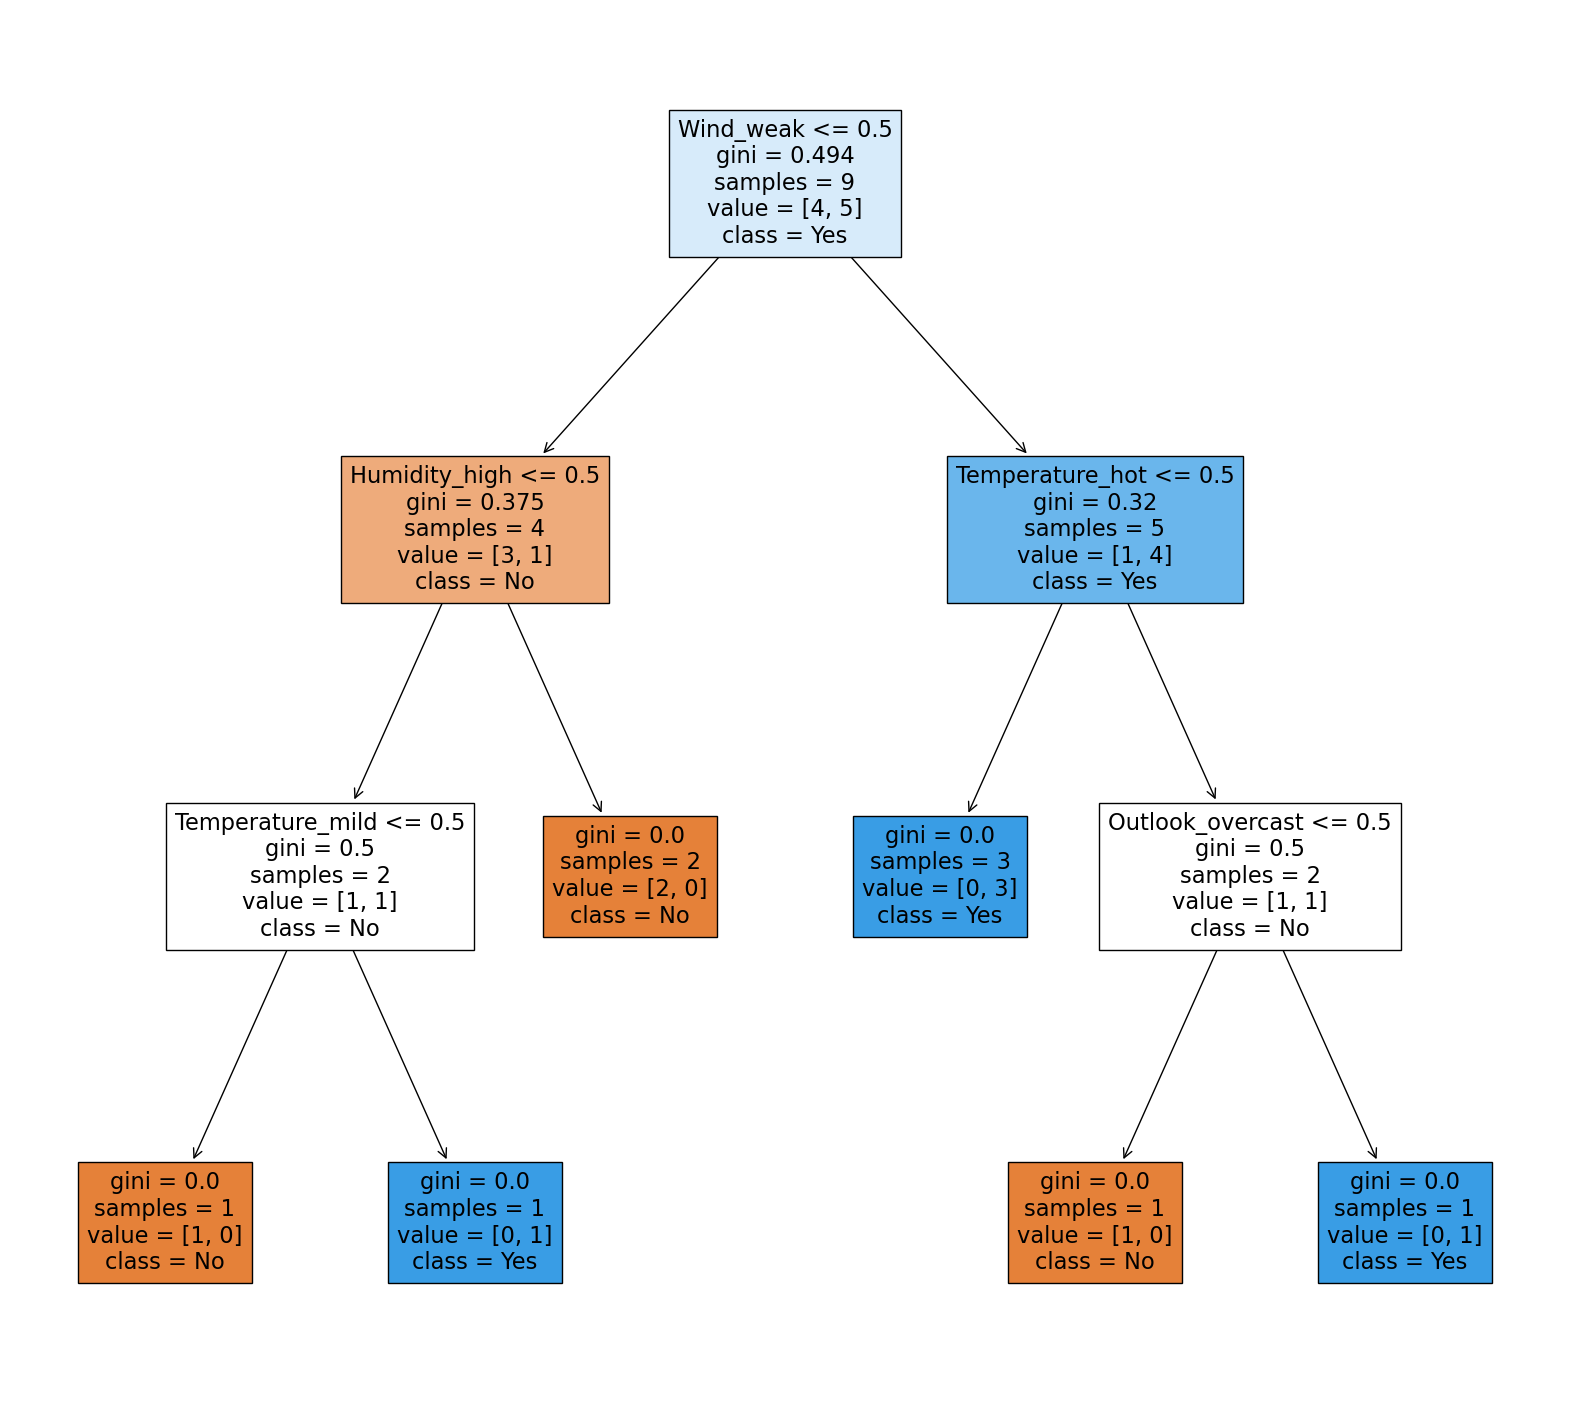

In [108]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
plt.figure(figsize=(20,18))
plot_tree(dt, feature_names=X.columns, class_names=y.unique(), filled=True)

In [109]:
y_pred

array(['Yes', 'Yes', 'Yes', 'No', 'Yes'], dtype=object)

In [101]:
y_test

3     Yes
7      No
12    Yes
6     Yes
8     Yes
Name: Play, dtype: object

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.75      0.75      0.75         4

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



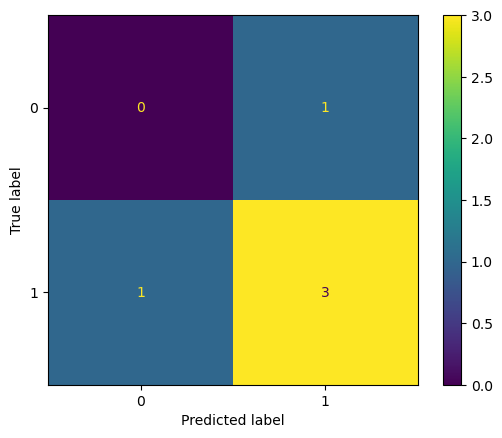

In [111]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()